# Saketh Mattupalli

# Co2 Regression

# Task 1: Importing required Libraries

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import math
import warnings
warnings.filterwarnings("ignore")

# Task 2: Analysing and Cleaning data

In [176]:
data = pd.read_csv('https://raw.githubusercontent.com/SakethMattupalli/csv/master/CO2%20emission.csv')
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [177]:
#No of rows and columns in the given data
data.shape

(1067, 13)

In [178]:
# Chosen 4 columns... because those 4 are numerical columns and we can later see the linearity 
# and correlation between those variables. 
#size of the engine and
# no of cylinders will effect the amount of co2 released.
#Also  Fuel consumption will effect the amount of co2 released.
emission_new = data[['CO2EMISSIONS','ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']]
emission_new.head()

,CO2EMISSIONS,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
0,196,2.0,4,8.5,33
1,221,2.4,4,9.6,29
2,136,1.5,4,5.9,48
3,255,3.5,6,11.1,25
4,244,3.5,6,10.6,27


# Task 3: Perform Exploratory Analysis

In [179]:
emission_new.corr()
#co2Emission  has high correlation with engine size, cylinder,fuel_consumption_comb
# and has high negative correaltion with fuel_consumption_comp_mpg.

,CO2EMISSIONS,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
CO2EMISSIONS,1.000000,0.874154,0.849685,0.892129,-0.906394
ENGINESIZE,0.874154,1.000000,0.934011,0.819482,-0.808554
CYLINDERS,0.849685,0.934011,1.000000,0.776788,-0.770430
FUELCONSUMPTION_COMB,0.892129,0.819482,0.776788,1.000000,-0.927965
FUELCONSUMPTION_COMB_MPG,-0.906394,-0.808554,-0.770430,-0.927965,1.000000


In [180]:
emission_new.describe()

,CO2EMISSIONS,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,256.228679,3.346298,5.794752,11.580881,26.441425
std,63.372304,1.415895,1.797447,3.485595,7.468702
min,108.000000,1.000000,3.000000,4.700000,11.000000
25%,207.000000,2.000000,4.000000,9.000000,21.000000
50%,251.000000,3.400000,6.000000,10.900000,26.000000
75%,294.000000,4.300000,8.000000,13.350000,31.000000
max,488.000000,8.400000,12.000000,25.800000,60.000000


In [181]:
emission_new['CO2EMISSIONS'].quantile(0.99)
#From above we can say that 99% of the given data has CO2 emissions less than 415.69,
# Where as Max co2 Emission is 488
#Min CO2 emission is 108

415.6999999999996

In [182]:
emission_new.dtypes

CO2EMISSIONS                  int64
ENGINESIZE                  float64
CYLINDERS                     int64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
dtype: object

# Task 4: Visualizing the data

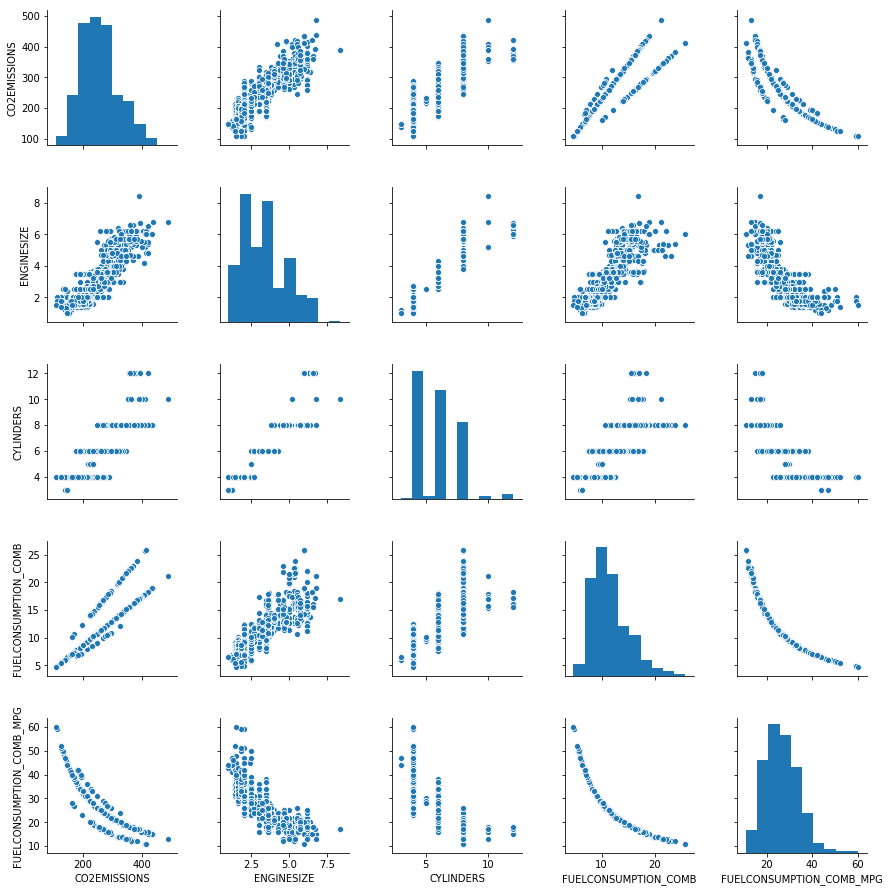

In [183]:
sns.pairplot(emission_new)

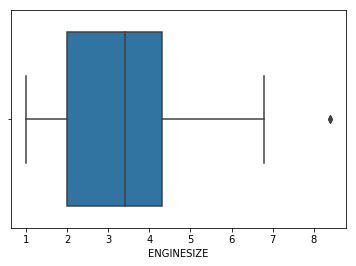

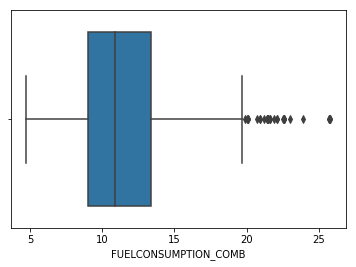

In [185]:
plt.figure()
sns.boxplot(emission_new['ENGINESIZE'])
plt.show()
sns.boxplot(emission_new['FUELCONSUMPTION_COMB'])
plt.show()
#From these plots we can say that fuel_consumption_comb is Right Skewed
# and there are more outliers in Fuel_consumption_comb

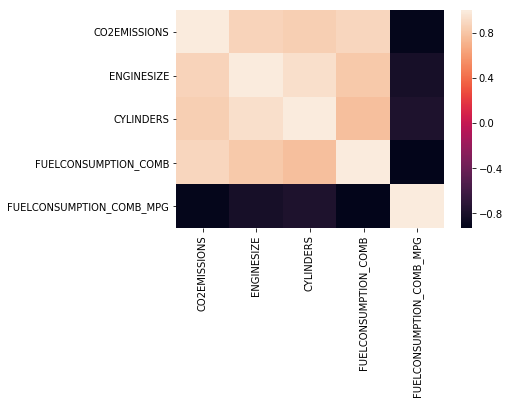

In [186]:
sns.heatmap(emission_new.corr())

In [187]:
#Dependent variable: Co2 Emissions
#Independent: 'EngineSize' and 'fuel_consumption_comb' because.. they have high corr with co2 emissions 
# and they are also highly linearly related.

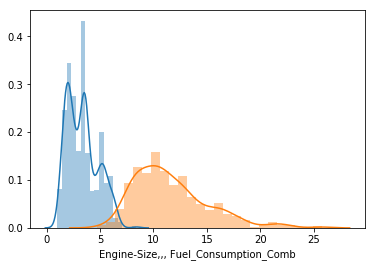

In [188]:
plt.figure()
sns.distplot(emission_new.ENGINESIZE)
sns.distplot(emission_new.FUELCONSUMPTION_COMB)
plt.xlabel('Engine-Size,,, Fuel_Consumption_Comb')
plt.show()
#From these graphs we can say that Fuel_consumption_comb is Right Skewed
#let's check the skewness

In [189]:
#Checking the skewness values
print('Engine_Size skewness:', emission_new['ENGINESIZE'].skew())
print('Fuel_consumption_comb skewness:', emission_new['FUELCONSUMPTION_COMB'].skew())
#It is clear that Fuel_Consumption_comb is right-skewed. Let's normalize it

Engine_Size skewness: 0.5678417900131225
Fuel_consumption_comb skewness: 1.032592476277465


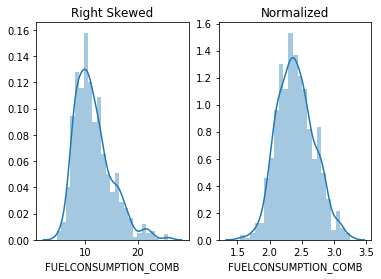

0.23689242745152153


In [190]:
plt.subplot(1,2,1)
sns.distplot(emission_new['FUELCONSUMPTION_COMB'])
plt.title('Right Skewed')
plt.subplot(1,2,2)
sns.distplot(np.log(emission_new['FUELCONSUMPTION_COMB']))
plt.title('Normalized')
plt.show()
print(np.log(emission_new['FUELCONSUMPTION_COMB']).skew())
#Now skewness is almost 0, so it is normal now, we can use it as a independent variable
#in simple linear regression

In [192]:
emission_new['FUELCONSUMPTION_COMB'] = np.log(emission_new['FUELCONSUMPTION_COMB'])
#type(emission_new['FUELCONSUMPTION_COMB'])
#emission_new['FUELCONSUMPTION_COMB']

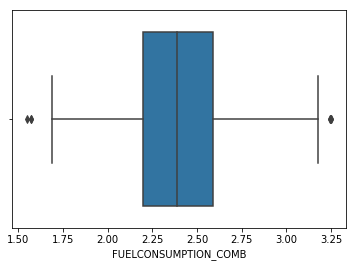

In [194]:
#Box plot after normalizing
sns.boxplot(emission_new['FUELCONSUMPTION_COMB'])

# Linear Rgression
<h1> Dependent variable : Co2 Emission</h1>
<h1> Independent Variable : Fuel Consumption comb </h1>

In [195]:
x = emission_new['FUELCONSUMPTION_COMB'].values.reshape(-1,1)
y = emission_new['CO2EMISSIONS'].values.reshape(-1,1)

In [132]:
type(y)

numpy.ndarray

In [196]:
regressor = LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [197]:
print(regressor.coef_)
print(regressor.intercept_)

[[204.88371923]]
[-236.35880477]


In [198]:
y_predict = regressor.predict(x_test)
#y_predict.flatten()

In [199]:
comparing = pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_predict.flatten()})
print(comparing.shape)
comparing.head()

(214, 2)


,Actual,Predicted
0,179,184.497706
1,317,301.393058
2,278,274.458401
3,253,254.930897
4,255,256.785061


In [200]:
metrics.r2_score(y_test,y_predict)

0.8476440921010049

In [201]:
metrics.r2_score(y_test,y_predict)
mse = metrics.mean_squared_error(y_test,y_predict)
rmse = sqrt(mse)
rmse

23.267417895814123

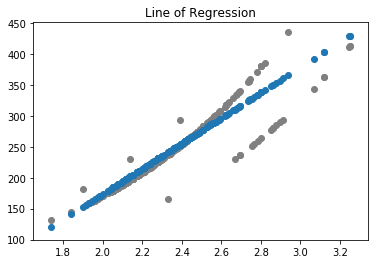

In [202]:
plt.scatter(x_test,y_test,color = 'grey')
plt.scatter(x_test,y_predict)
plt.title("Line of Regression")
plt.show()

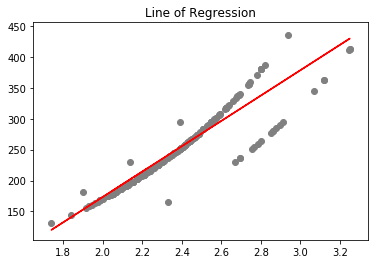

In [203]:
plt.plot(x_test,y_predict, color = 'red')
plt.scatter(x_test,y_test, color = 'grey')
plt.title("Line of Regression")
plt.show()

# Multiple Regression

In [204]:
emission_new.head()

,CO2EMISSIONS,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
0,196,2.0,4,2.140066,33
1,221,2.4,4,2.261763,29
2,136,1.5,4,1.774952,48
3,255,3.5,6,2.406945,25
4,244,3.5,6,2.360854,27


In [205]:
x = emission_new[['ENGINESIZE','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']].values
y = emission_new['CO2EMISSIONS'].values

In [206]:
regressor = LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [207]:
y_predict = regressor.predict(x_test)

In [208]:
comparing = pd.DataFrame({'Actual':y_test,'Predicted':y_predict})
#print(comparing.shape)
comparing.head()

,Actual,Predicted
0,253,250.272855
1,191,188.136575
2,352,345.390765
3,221,216.842200
4,196,192.159541


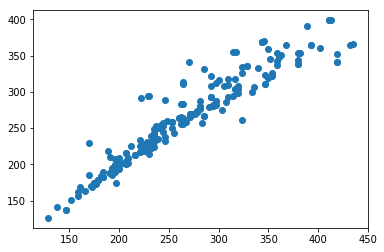

In [209]:
plt.scatter(y_test,y_predict)

In [210]:
metrics.r2_score(y_test,y_predict)

0.9002106954089698

In [211]:
mse = metrics.mean_squared_error(y_test,y_predict)
rmse = sqrt(mse)
rmse

21.629296144910366

<h3> from above we have seen, RMSE of linear regression more than RMSE of multiple regression  </h3>
<h3> we've also seen linear regression has given less than the accuracy of multiple regression</h3>
<h3> So from above , we can conclude for this given data, Multiple Regression Model Performs better </h3>